In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import requests
import tweepy
import time
import datetime

plt.style.use('ggplot')

from pprint import pprint
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


In [2]:
# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)


In [3]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [4]:
target_users = ('@BBCWorld', '@CBSNews', '@CNNnewsroom', '@FoxNews', '@nytimes')

sentiments = []
    
for user in target_users:
        
    counter = 1
    
    public_tweets = api.user_timeline( user, count=100, result_type="recent")
    
    compound_list = []
    pos_list = []
    neg_list = []
    neu_list = []
    counter_list = []
    
    for tweet in public_tweets:
        
        results = analyzer.polarity_scores(tweet['text'])
        compound = results['compound']
        pos = results['pos']
        neg = results['neg']
        neu = results['neu']
        
        compound_list.append(compound)
        pos_list.append(pos)
        neg_list.append(neg)
        neu_list.append(neu)
        
        counter_list.append(counter)
        counter += 1
        
    sentiment_dict = {'User' : user,
                      'Compound' : (compound_list),
                      'Positive' : (pos_list),
                      'Negative' : (neg_list),
                      'Neutral' : (neu_list),
                      'Tweets Ago' : (counter_list)
           }
        
    sentiments.append(sentiment_dict)
    

current_time = datetime.datetime.now().strftime("%y-%m-%d (Y-M-D)")

print(len(counter_list))


100


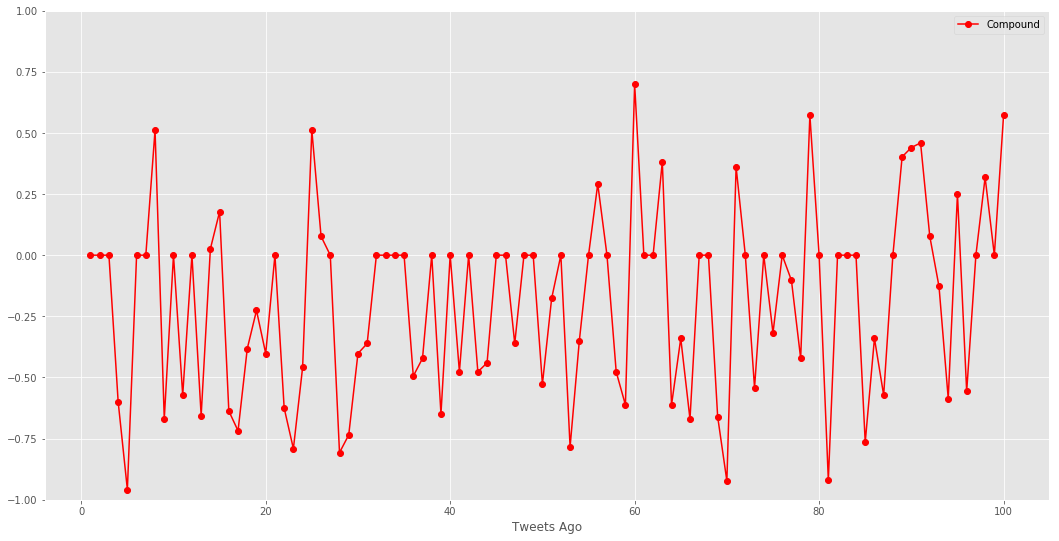

In [5]:
colors = ['red', 'lightskyblue', 'limegreen', 'blue', 'grey']
outlets = ['BBC', 'CBS', 'CNN', 'FOX', 'NYT']

bbc_df = pd.DataFrame(sentiments[0]).set_index("User").round(3)
bbc_df.plot('Tweets Ago', 'Compound', marker='o', figsize=(18,9), grid=True, ylim=(-1,1), c=colors[0])

bbc_df.to_csv(f'output_csv/bbc_{current_time[0:8]}')

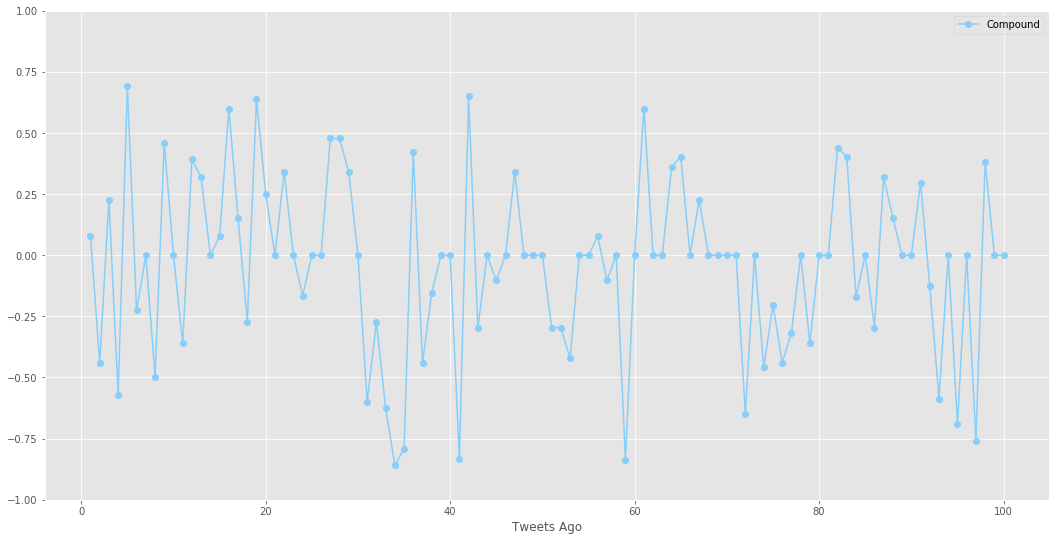

In [6]:
cbs_df = pd.DataFrame(sentiments[1]).set_index("User").round(3)
cbs_df.plot('Tweets Ago', 'Compound', marker='o', figsize=(18,9), grid=True, ylim=(-1,1), c=colors[1])

cbs_df.to_csv(f'output_csv/cbs_{current_time[0:8]}')

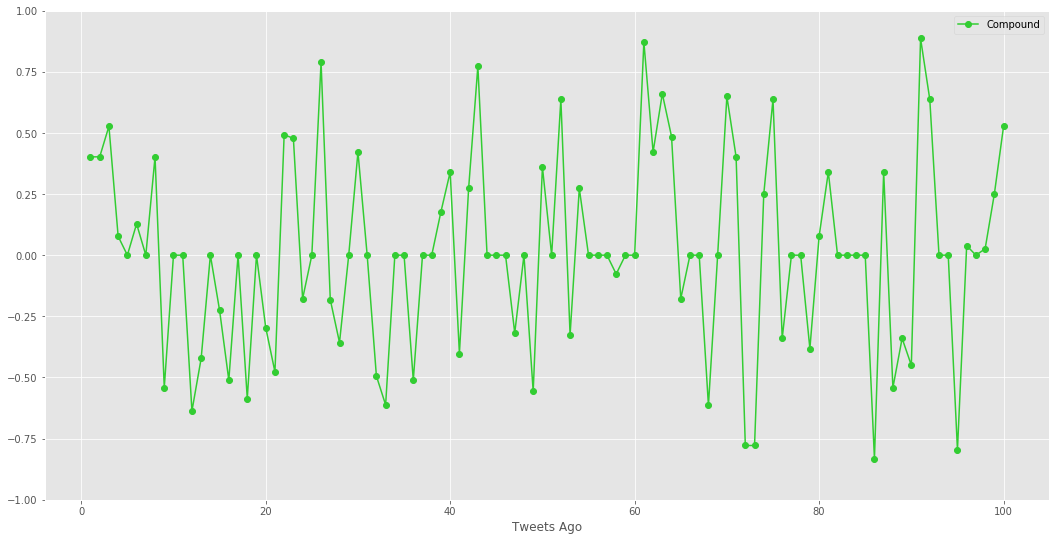

In [7]:
cnn_df = pd.DataFrame(sentiments[2]).set_index("User").round(3)
cnn_df.plot('Tweets Ago', 'Compound', marker='o', figsize=(18,9), grid=True, ylim=(-1,1), c=colors[2])

cnn_df.to_csv(f'output_csv/cnn_{current_time[0:8]}')

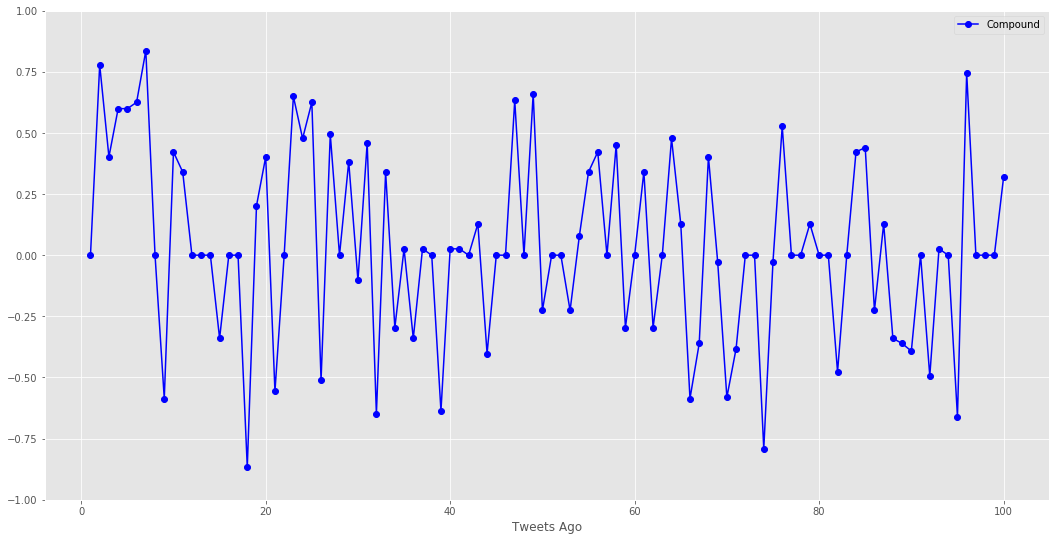

In [8]:
fox_df = pd.DataFrame(sentiments[3]).set_index("User").round(3)
fox_df.plot('Tweets Ago', 'Compound', marker='o', figsize=(18,9), grid=True, ylim=(-1,1), c=colors[3])

fox_df.to_csv(f'output_csv/fox_{current_time[0:8]}')

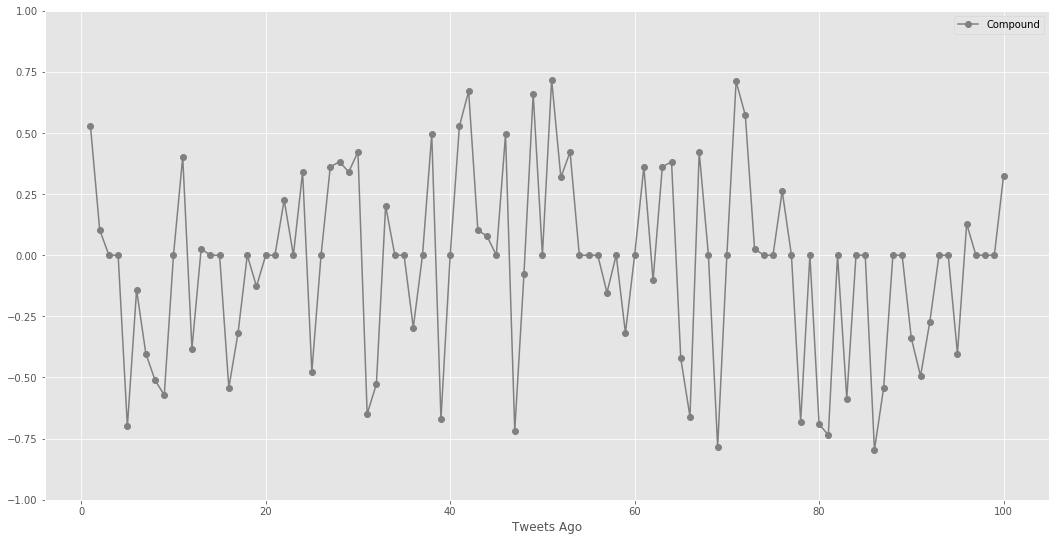

In [9]:
nyt_df = pd.DataFrame(sentiments[4]).set_index("User").round(3)
nyt_df.plot('Tweets Ago', 'Compound', marker='o', figsize=(18,9), grid=True, ylim=(-1,1), c=colors[4])

nyt_df.to_csv(f'output_csv/nyt_{current_time[0:8]}')

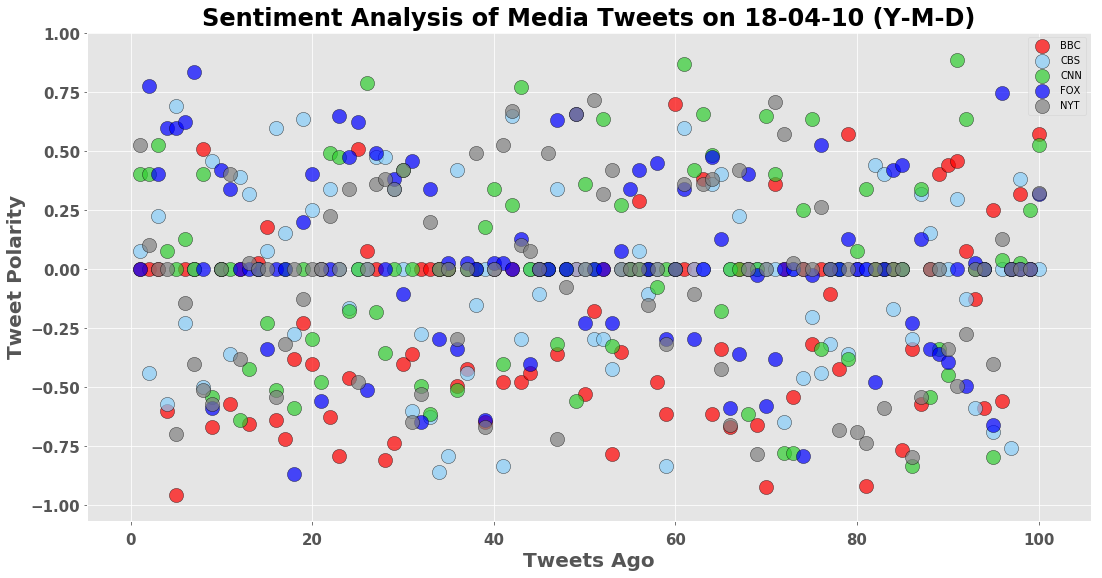

In [10]:
df_list = [bbc_df, cbs_df, cnn_df, fox_df, nyt_df]

fig, ax = plt.subplots(figsize=(18,9))

for i in range(len(df_list)):
    df = df_list[i]
    ax.scatter(df['Tweets Ago'], df['Compound'], color=colors[i], s=200, alpha=0.7, edgecolor='black')
    
ax.legend(outlets)

plt.xticks(fontsize=15, fontweight='bold', y=-.01)
plt.yticks(fontsize=15, fontweight='bold')

plt.title(f'Sentiment Analysis of Media Tweets on {current_time}', fontsize=24, fontweight='bold')
plt.xlabel('Tweets Ago', fontsize=20, fontweight='bold')
plt.ylabel('Tweet Polarity', fontsize=20, fontweight='bold')

plt.savefig(f'output_images/media_tweet_analysis{current_time[0:8]}.png')

In [11]:
bbc_comp = round(np.mean(bbc_df['Compound']), 3)
cbs_comp = round(np.mean(cbs_df['Compound']), 3)
cnn_comp = round(np.mean(cnn_df['Compound']), 3)
fox_comp = round(np.mean(fox_df['Compound']), 3)
nyt_comp = round(np.mean(nyt_df['Compound']), 3)

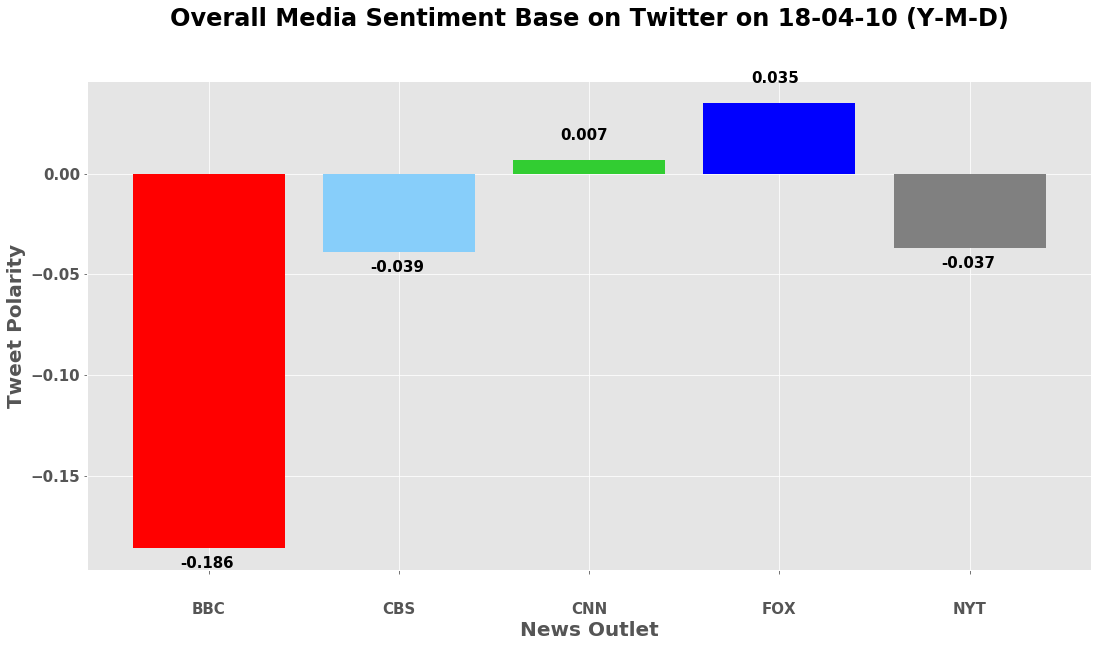

In [12]:
comp_scores = [bbc_comp, cbs_comp, cnn_comp, fox_comp, nyt_comp]
x_axis = np.arange(len(comp_scores))
fig = plt.figure(figsize=(18,9))

plt.bar(x_axis, comp_scores, color=colors, align="edge", figure=fig)

tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, outlets, fontsize=15, y=-0.05, fontweight='bold')
plt.yticks(fontsize=15, fontweight='bold')

plt.title(f'Overall Media Sentiment Base on Twitter on {current_time}', fontsize=24, fontweight='bold', y=1.1)
plt.xlabel('News Outlet', fontsize=20, fontweight='bold')
plt.ylabel('Tweet Polarity', fontsize=20, fontweight='bold')


for i, v in enumerate(comp_scores):
    if v > 0:
        plt.text(i + 0.25, v + .01, str(v), color='black', fontweight='bold', fontsize=15)
    else:
        plt.text(i + 0.25, v -.01, str(v), color='black', fontweight='bold', fontsize=15)

plt.savefig(f'output_images/overall_sentiments{current_time[0:8]}.png')